<a href="https://colab.research.google.com/github/R4255/_opencv/blob/main/Image_Alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reading reference image: form.jpg
reading image to align scanned-form.jpg


'orb.detectandcompute() in this function mask parameter role (optional ) specifies the region of interest where all the process \nshould take place /The mask is a binary image of the same size as the input image, where pixels with a value of 0 are ignored in the keypoint detection process, and pixels with a value of 1 are considered.'

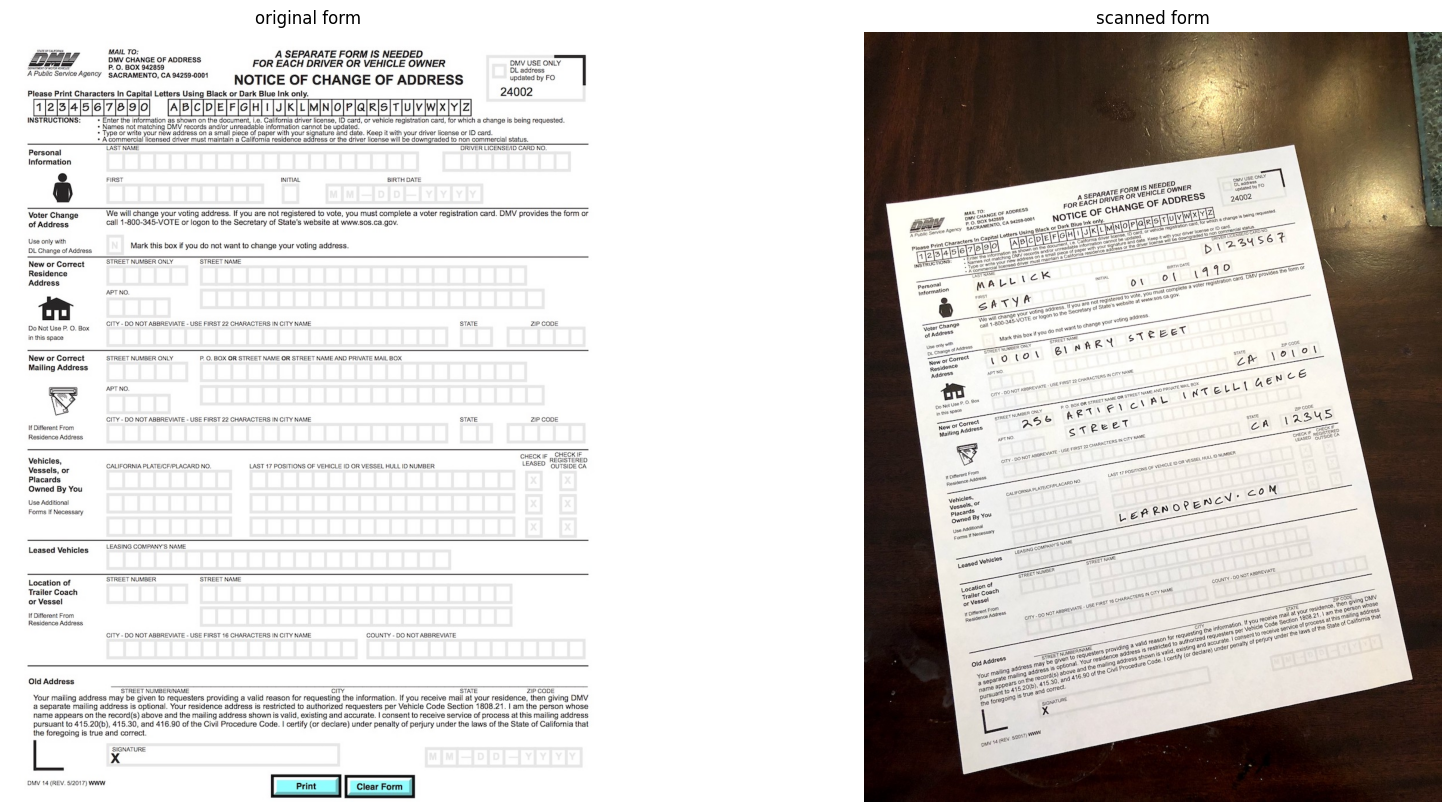

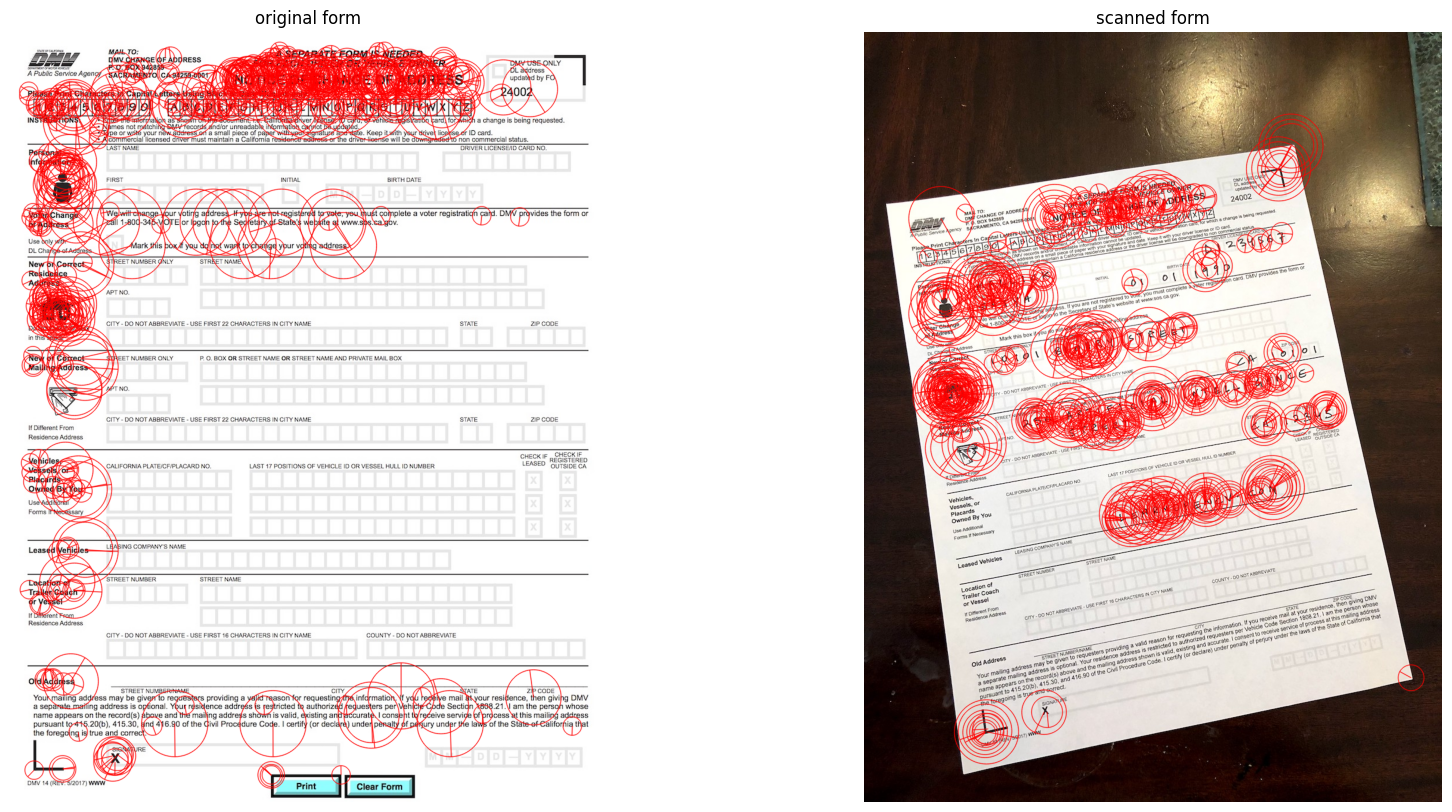

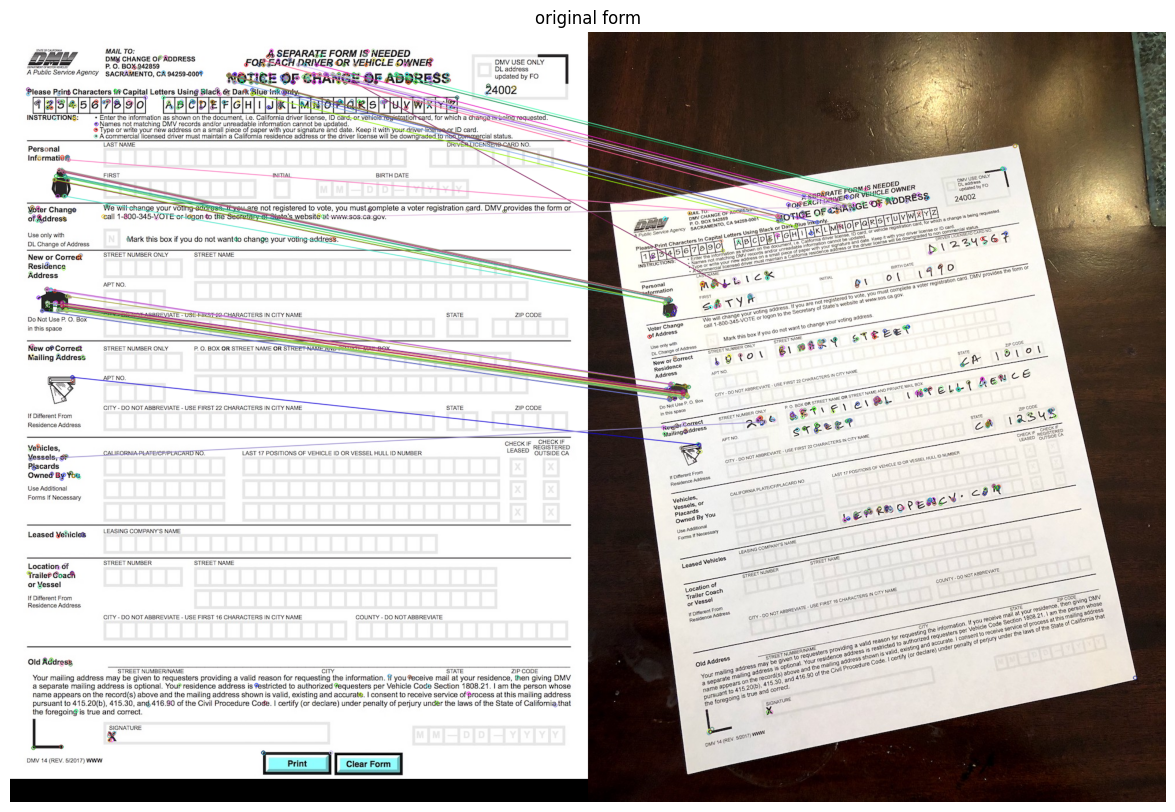

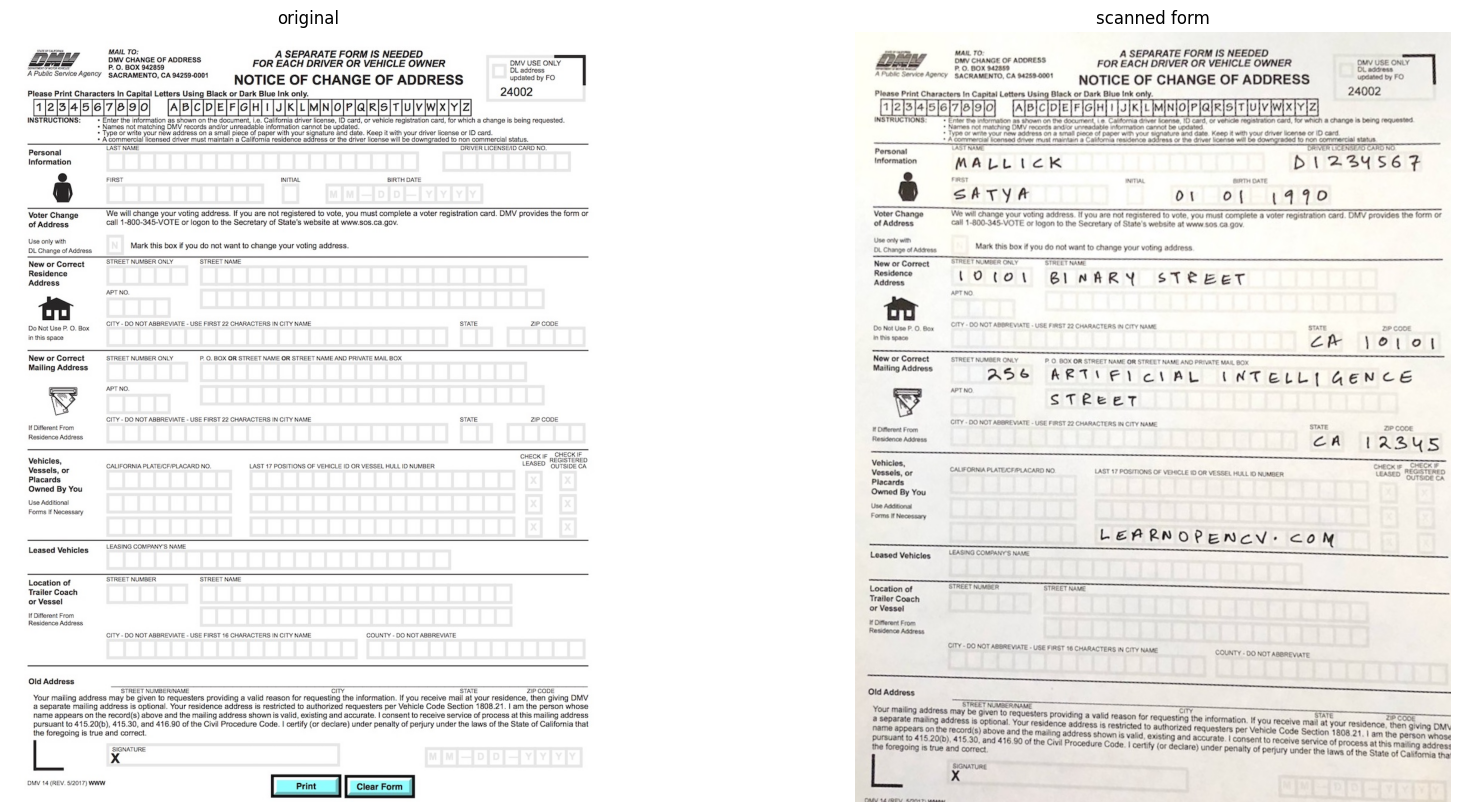

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from urllib.request import urlretrieve
%matplotlib inline
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/zuwnn6rqe0f4zgh/opencv_bootcamp_assets_NB8.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB8.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

reffilename="form.jpg"
print('reading reference image:',reffilename)
im1=cv2.imread(reffilename,cv2.IMREAD_COLOR)
im1=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
imfilename='scanned-form.jpg'
print("reading image to align",imfilename)
im2=cv2.imread(imfilename,cv2.IMREAD_COLOR)
im2=cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=[20,10]);
plt.subplot(121);plt.axis('off');plt.imshow(im1);plt.title("original form")
plt.subplot(122);plt.axis('off');plt.imshow(im2);plt.title("scanned form")
#we can think of cornor points
#assume they may remain unchanged during the transformation
im1_gray=cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
im2_gray=cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
MAX_NUM_FEATURES=500
orb=cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1,descriptors1=orb.detectAndCompute(im1_gray,None)
keypoints2,descriptors2=orb.detectAndCompute(im2_gray,None)
im1_display=cv2.drawKeypoints(im1,keypoints1,outImage=np.array([]),color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display=cv2.drawKeypoints(im2,keypoints2,outImage=np.array([]),color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off');plt.imshow(im1_display);plt.title("original form")
plt.subplot(122);plt.axis('off');plt.imshow(im2_display);plt.title("scanned form")
#match features
matcher=cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches=list(matcher.match(descriptors1,descriptors2,None))
matches.sort(key=lambda x:x.distance,reverse=False)#false stores the result in the ascending order
numGoodMatches=int(len(matches)*0.1)
matches=matches[:numGoodMatches]
#draw the top matches
im_matches=cv2.drawMatches(im1,keypoints1,im2,keypoints2,matches,None)
plt.figure(figsize=[40,10])
plt.imshow(im_matches);plt.axis('off');plt.title('original form')
#here we find Homography
import numpy
#extract location of the good matches
points1=np.zeros((len(matches),2),dtype=np.float32)
points2=np.zeros((len(matches),2),dtype=np.float32)
for i, match in enumerate(matches):
    points1[i,:]=keypoints1[match.queryIdx].pt
    points2[i,:]=keypoints2[match.trainIdx].pt

    #match.queryIdx refers to the index of the keypoint in the first image (keypoints1) that corresponds to the current match.
    #match.trainIdx refers to the index of the keypoint in the second image (keypoints2) that corresponds to the current match.
h,mask=cv2.findHomography(points2,points1,cv2.RANSAC)
'''h: This is the output homography matrix. It represents the transformation that maps points from the second image (points2) to their corresponding points in the first image (points1).

mask: This is a binary mask indicating which points were used to calculate the homography. If mask[i] is non-zero, then points2[i] was used to calculate the homography. This can be useful to identify outliers.

'''
'''cv2.RANSAC: This is the method used for finding the homography. RANSAC (Random Sample Consensus) is a robust method for estimating a model's parameters in the presence of outliers. In the context of cv2.findHomography, RANSAC is used to filter out mismatched or incorrect correspondences in the sets of points.
'''
'''plt.axis('off') is used to turn off the axis labels and ticks in a Matplotlib plot'''
height,width,channels=im1.shape
im2_reg=cv2.warpPerspective(im2,h,(width,height))
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(im1);plt.axis('off');plt.title("original")
plt.subplot(122);plt.imshow(im2_reg);plt.axis('off');plt.title('scanned form')
'''The ORB algorithm combines the strengths of the FAST corner detection algorithm and the BRIEF descriptor.'''
''' key feature in orb is that
a point of interest in the image that is invariant to rotation and scale changes'''
'''orb.detectandcompute() in this function mask parameter role (optional ) specifies the region of interest where all the process
should take place /The mask is a binary image of the same size as the input image, where pixels with a value of 0 are ignored in the keypoint detection process, and pixels with a value of 1 are considered.'''

